# Data Collection

In [1]:
import os
os.chdir('D:/')

In [2]:
import pandas as pd 

In [4]:
df=pd.read_csv('news.csv')
df

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1
...,...,...
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1


In [5]:
df.tail()

,Headline,Label
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1
4008,Vice President Mike Pence Leaves NFL Game Beca...,0


# Preprocessing the data

In [6]:
import re

In [9]:
pre=[]
for i in df['Headline']:
    s=i.lower()
    s1=re.sub('[^a-z]',' ',s)
    pre.append(s1)

In [10]:
pre[0:3]

['four ways bob corker skewered donald trump',
 'linklater s war veteran comedy speaks to modern america  says star',
 'trump s fight with corker jeopardizes his legislative agenda']

In [13]:
df['Headline1']=pre
df

,Headline,Label,Headline1
0,Four ways Bob Corker skewered Donald Trump,1,four ways bob corker skewered donald trump
1,Linklater's war veteran comedy speaks to moder...,1,linklater s war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...,1,trump s fight with corker jeopardizes his legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,egypt s cheiron wins tie up with pemex for mex...
4,Jason Aldean opens 'SNL' with Vegas tribute,1,jason aldean opens snl with vegas tribute
...,...,...,...
4004,Trends to Watch,0,trends to watch
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,trump jr is soon to give a minute speech f...
4006,"Ron Paul on Trump, Anarchism & the AltRight",0,ron paul on trump anarchism the altright
4007,China to accept overseas trial data in bid to ...,1,china to accept overseas trial data in bid to ...


# Define x and y

In [14]:
x=df['Headline1']
y=df['Label']

In [15]:
x

0              four ways bob corker skewered donald trump
1       linklater s war veteran comedy speaks to moder...
2       trump s fight with corker jeopardizes his legi...
3       egypt s cheiron wins tie up with pemex for mex...
4             jason aldean opens  snl  with vegas tribute
                              ...                        
4004                                      trends to watch
4005    trump jr  is soon to give a    minute speech f...
4006          ron paul on trump  anarchism   the altright
4007    china to accept overseas trial data in bid to ...
4008    vice president mike pence leaves nfl game beca...
Name: Headline1, Length: 4009, dtype: object

In [16]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

# Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [20]:
tf=TfidfVectorizer()
cv=CountVectorizer()

In [21]:
x1=tf.fit_transform(x).toarray()
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
x2=cv.fit_transform(x).toarray()
x2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Split the data

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=21)

# Model Buliding

In [26]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

In [27]:
nn=Sequential()

In [28]:
nn.add(Dense(1000,input_dim=x_train.shape[1],activation ='relu'))
nn.add(BatchNormalization())

nn.add(Dense(1000,activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Dense(1000,activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Dense(1,activation='sigmoid'))


# Compile the Model

In [33]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Callbacks

In [29]:
from keras.callbacks import EarlyStopping
Early= EarlyStopping(monitor='val_loss',patience=5)

# Fitting Model

In [36]:
hist=nn.fit(x_train,y_train,validation_split=0.2,callbacks=[Early],epochs=50)

Epoch 1/50
81/81 [==============================] - 5s 63ms/step - loss: 0.0897 - accuracy: 0.9704 - val_loss: 0.5266 - val_accuracy: 0.8474
Epoch 2/50
81/81 [==============================] - 5s 63ms/step - loss: 0.0499 - accuracy: 0.9852 - val_loss: 0.6109 - val_accuracy: 0.8474
Epoch 3/50
81/81 [==============================] - 5s 63ms/step - loss: 0.0218 - accuracy: 0.9914 - val_loss: 0.6460 - val_accuracy: 0.8551
Epoch 4/50
81/81 [==============================] - 5s 63ms/step - loss: 0.0219 - accuracy: 0.9949 - val_loss: 0.6787 - val_accuracy: 0.8333
Epoch 5/50
81/81 [==============================] - 5s 63ms/step - loss: 0.0234 - accuracy: 0.9938 - val_loss: 0.6912 - val_accuracy: 0.8474
Epoch 6/50
81/81 [==============================] - 5s 62ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.7330 - val_accuracy: 0.8520


# Plot the result

In [35]:
import matplotlib.pyplot as plt

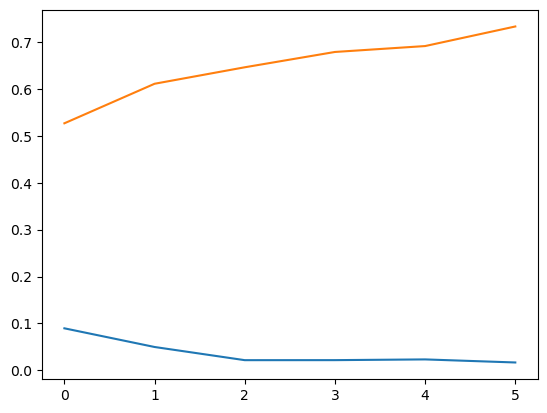

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Prediction

In [38]:
y_pred1=nn.predict(x_test)
y_pred1

26/26 [==============================] - 0s 9ms/step


array([[2.81256206e-07],
       [1.08049195e-02],
       [9.97428834e-01],
       [9.99888182e-01],
       [9.98124421e-01],
       [9.31320071e-01],
       [2.19084679e-08],
       [9.67200577e-01],
       [9.82984126e-01],
       [9.99108016e-01],
       [6.37274468e-04],
       [9.99991417e-01],
       [4.22933226e-04],
       [6.88436702e-02],
       [9.98988926e-01],
       [1.00000000e+00],
       [1.32309437e-01],
       [3.79569174e-05],
       [9.99999702e-01],
       [9.99890387e-01],
       [5.37826419e-01],
       [7.81570066e-07],
       [3.36301979e-04],
       [8.75320268e-07],
       [1.53883217e-09],
       [9.83275890e-01],
       [2.05512106e-06],
       [5.34412038e-06],
       [9.99999642e-01],
       [1.43465877e-04],
       [9.52202320e-01],
       [2.92851380e-03],
       [3.97386521e-01],
       [9.99998629e-01],
       [9.99856651e-01],
       [3.00776690e-01],
       [9.99048412e-01],
       [9.99856412e-01],
       [1.99856292e-08],
       [1.01948081e-06],


In [40]:
y_pred=[]

for i in y_pred1:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
y_pred

[0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


In [42]:
y_test

859     0
2623    1
553     1
2330    1
1005    1
       ..
1673    1
3841    0
3229    1
1302    0
1701    0
Name: Label, Length: 802, dtype: int64

# Evalution of Testing Data

In [43]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [45]:
acc=accuracy_score(y_pred,y_test)
clf=classification_report(y_pred,y_test)
print('Accuracy:',acc)
print('Classification Report:\n',clf)

Accuracy: 0.8428927680798005
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       427
           1       0.84      0.83      0.83       375

    accuracy                           0.84       802
   macro avg       0.84      0.84      0.84       802
weighted avg       0.84      0.84      0.84       802



# Unseen Data

In [56]:
text=input('Enter the Headline: ')
s=text.lower()
s1=re.sub('[^a-z]',' ',s)

s2=tf.transform([s1]).toarray()

prob=nn.predict(s2)
print('Given Probability:',prob)

if prob>0.5:
    print('This is Positive Headline')
else:
    print('This is Negative Headline')
        

Enter the Headline: China to accept overseas trial data in bid to ...
1/1 [==============================] - 0s 32ms/step
Given Probability: [[0.9999982]]
This is Positive Headline


In [54]:
text=input('Enter the Headline: ')
s=text.lower()
s1=re.sub('[^a-z]',' ',s)

s2=tf.transform([s1]).toarray()

prob=nn.predict(s2)
print('Given Probability:',prob)

if prob>0.5:
    print('This is Positive Headline')
else:
    print('This is Negative Negative')

Enter the Headline: Trends to Watch	
1/1 [==============================] - 0s 37ms/step
Given Probability: [[0.00833299]]
This is Negative Negative
